In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib.ticker as ticker

### Вопрос 6

В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову.
Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

In [21]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [4]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
milk    168 non-null int64
dtypes: int64(1)
memory usage: 2.6 KB


In [22]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


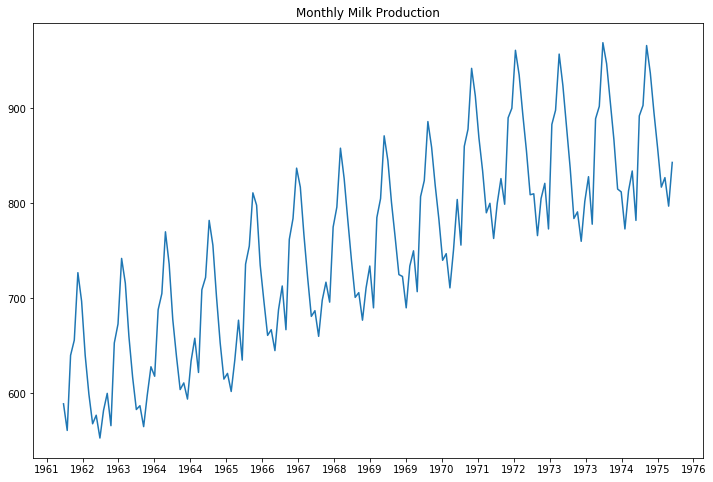

In [6]:
plt.figure(figsize=(12, 8));

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))

plt.plot(milk.milk);
plt.title('Monthly Milk Production');

plt.show()

In [23]:
milk['daily'] = milk['milk'].values.flatten() / milk.index.days_in_month

In [24]:
milk.head()

,milk,daily
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613


### Вопрос 7

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

In [ ]:
import statsmodels.api as sm

In [25]:
_, p, _, _, _, _ = sm.tsa.stattools.adfuller(milk.daily)
print("p-value = {0:.2f}".format(p))

p-value = 0.68


При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:

In [26]:
milk.daily_diff12 = milk.daily - milk.daily.shift(12)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [27]:
_, p, _, _, _, _ = sm.tsa.stattools.adfuller(milk.daily_diff12.dropna())
print("p-value = {0:.2f}".format(p))

p-value = 0.22


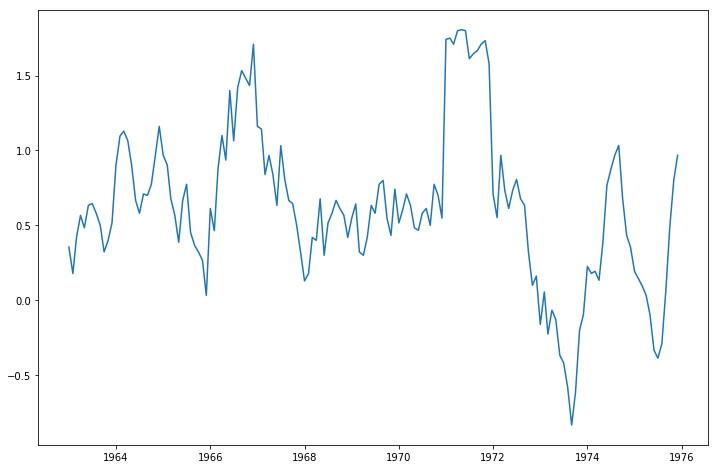

In [35]:
plt.figure(figsize=(12, 8));

plt.plot(milk.daily_diff12.dropna());

Дифференцирование и убрать тренд можно делать так:

In [38]:
milk.daily_diff1_12 = milk.daily_diff12 - milk.daily_diff12.shift(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [39]:
_, p, _, _, _, _ = sm.tsa.stattools.adfuller(milk.daily_diff1_12.dropna())
print("p-value = {0:.2f}".format(p))

p-value = 0.00


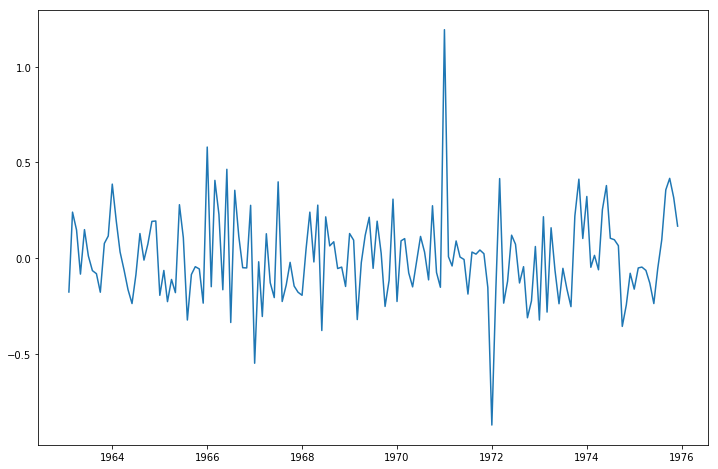

In [40]:
plt.figure(figsize=(12, 8));

plt.plot(milk.daily_diff1_12.dropna());

Ряд становится стационарным после двух последовательных дифференцирований — сезонного и обычного

### Вопрос 8

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции.

In [31]:
import statsmodels.api as sm

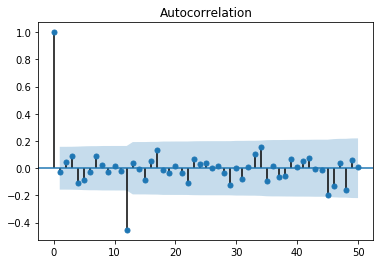

In [46]:
sm.graphics.tsa.plot_acf(milk.daily_diff1_12.dropna().values.squeeze(), lags=50);

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?

### Q = 1

### Вопрос 9

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. 

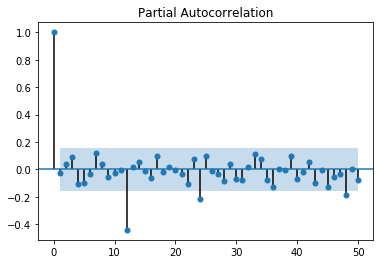

In [43]:
sm.graphics.tsa.plot_pacf(milk.daily_diff1_12.dropna().values.squeeze(), lags=50);

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?

### p = 0